In [5]:
from qiskit import IBMQ
from qiskit import QuantumCircuit
from qiskit import Aer

from qiskit.visualization import plot_histogram

# IBMQ.save_account(open("token.txt","r").read())
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
provider = IBMQ.get_provider(hub='ibm-q') ## public hub
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [13]:
circuit = QuantumCircuit(2, 0)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw(initial_state=True)

┌───┐      ░ ┌─┐   
  q_0: |0>┤ H ├──■───░─┤M├───
          └───┘┌─┴─┐ ░ └╥┘┌─┐
  q_1: |0>─────┤ X ├─░──╫─┤M├
               └───┘ ░  ║ └╥┘
meas_0: 0 ══════════════╩══╬═
                           ║ 
meas_1: 0 ═════════════════╩═

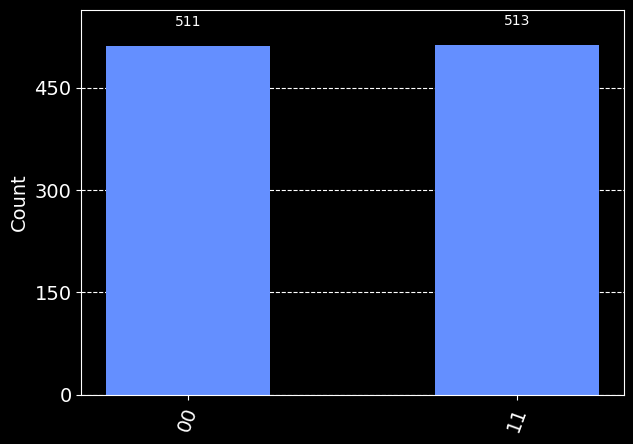

In [14]:
sim = Aer.get_backend("aer_simulator")
result = sim.run(circuit).result()
counts = result.get_counts()
plot_histogram(counts)